In [11]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/university_rank_no_nan.csv", index_col=0)
df = df.dropna(axis=0)
df.head()

,University,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,Teaching,Research,Citations,Industry_Income,International_Outlook,International_Students(%),Percentage_Female(%),Percentage_Male(%)
0,University of Oxford,United Kingdom,20.664,11.2,95.4,1,90.5,99.6,98.4,65.5,excellent,41.0,46.0,54.0
2,University of Cambridge,United Kingdom,18.978,10.9,94.4,3,91.4,98.7,95.8,59.3,excellent,37.0,47.0,53.0
4,Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5,90.5,92.4,99.5,86.9,excellent,34.0,39.0,61.0
5,Princeton University,United States,7.983,8.1,93.2,6,90.3,96.3,98.8,58.6,excellent,25.0,45.0,55.0
6,Harvard University,United States,20.823,9.2,93.0,7,89.2,98.6,99.1,47.3,excellent,24.0,49.0,51.0


In [12]:
# 1. Odstranjevanje kategoricnih podatkov in standardizacija stevilskih.

df_new = df.drop(['University', 'Country', 'International_Outlook'], axis=1)
df_new.head()

,Number_students,Numb_students_per_Staff,Score_Result,Rank,Teaching,Research,Citations,Industry_Income,International_Students(%),Percentage_Female(%),Percentage_Male(%)
0,20.664,11.2,95.4,1,90.5,99.6,98.4,65.5,41.0,46.0,54.0
2,18.978,10.9,94.4,3,91.4,98.7,95.8,59.3,37.0,47.0,53.0
4,11.247,8.6,93.6,5,90.5,92.4,99.5,86.9,34.0,39.0,61.0
5,7.983,8.1,93.2,6,90.3,96.3,98.8,58.6,25.0,45.0,55.0
6,20.823,9.2,93.0,7,89.2,98.6,99.1,47.3,24.0,49.0,51.0


In [13]:
from sklearn.preprocessing import StandardScaler

stevilski = ['Number_students', 'Numb_students_per_Staff', 'Score_Result', 'Rank', 'Teaching', 'Research', 'Citations',
             'Industry_Income', 'International_Students(%)', 'Percentage_Female(%)', 'Percentage_Male(%)']

df_new[stevilski] = StandardScaler().fit_transform(df_new[stevilski])
df_new.head()

,Number_students,Numb_students_per_Staff,Score_Result,Rank,Teaching,Research,Citations,Industry_Income,International_Students(%),Percentage_Female(%),Percentage_Male(%)
0,-0.107344,-0.441919,4.092515,-2.486425,5.161454,5.129243,1.958139,1.220575,2.596675,-0.088723,0.373922
2,-0.131100,-0.458994,4.026242,-2.470967,5.234659,5.069499,1.860363,0.829168,2.249773,-0.026791,0.312265
4,-0.240029,-0.589903,3.973223,-2.455509,5.161454,4.651296,1.999506,2.571561,1.989596,-0.522249,0.805524
5,-0.286018,-0.618361,3.946713,-2.447780,5.145187,4.910184,1.973182,0.784976,1.209065,-0.150656,0.435580
6,-0.105104,-0.555753,3.933459,-2.440051,5.055715,5.062861,1.984463,0.071605,1.122340,0.097073,0.188950


In [19]:
# 2. Hierarhicno grucenje in izris dendrograma.
from scipy.cluster.hierarchy import linkage

link = linkage(df_new, method='single')
link

array([[1.07300000e+03, 1.10300000e+03, 1.28763682e-01, 2.00000000e+00],
       [1.00000000e+03, 1.02500000e+03, 1.77280100e-01, 2.00000000e+00],
       [6.25000000e+02, 6.33000000e+02, 1.91301815e-01, 2.00000000e+00],
       ...,
       [8.40000000e+01, 2.40800000e+03, 5.41644701e+00, 7.00000000e+00],
       [2.41300000e+03, 2.41400000e+03, 6.54432292e+00, 1.20800000e+03],
       [9.54000000e+02, 2.41500000e+03, 2.18098195e+01, 1.20900000e+03]])

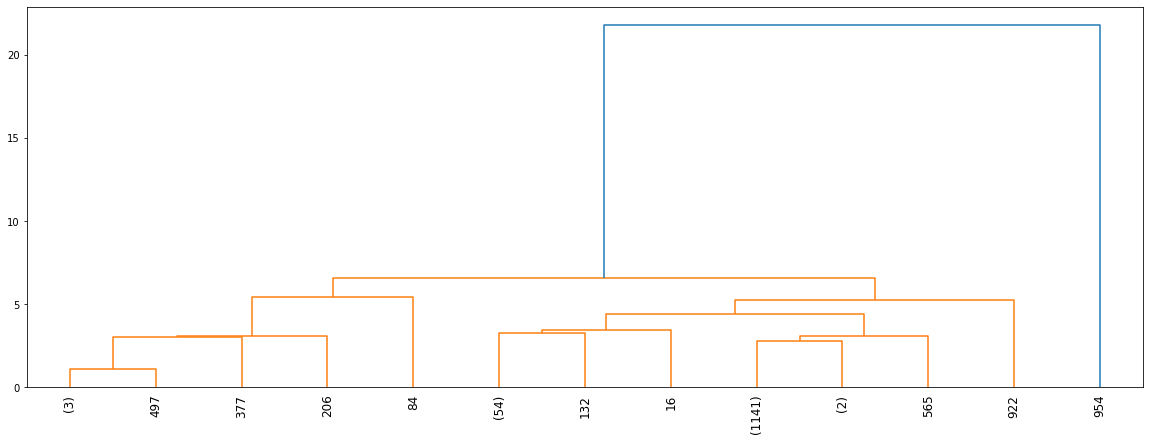

In [22]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

najnizji_nivo = 5

plt.figure(figsize=(20,7))
dendrogram(link,
           orientation='top',
           distance_sort='descending',
           p=najnizji_nivo,
           truncate_mode='level',
           leaf_rotation=90)
plt.show()

In [24]:
# 3. Uporaba KMeans algoritma.
import collections
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_new)
collections.Counter(kmeans.labels_)

Counter({0: 425, 1: 784})

In [25]:
# 4. Optimalno število gruč (preizkus do 8 gruč) in graf komolca.
kmeans = KMeans(n_clusters=2).fit(df_new)
print(f'Inertia za gručenje v dve gruči: {kmeans.inertia_}')

kmeans = KMeans(n_clusters=3).fit(df_new)
print(f'Inertia za gručenje v tri gruče: {kmeans.inertia_}')

kmeans = KMeans(n_clusters=4).fit(df_new)
print(f'Inertia za gručenje v štiri gruče: {kmeans.inertia_}')

kmeans = KMeans(n_clusters=5).fit(df_new)
print(f'Inertia za gručenje v pet gruče: {kmeans.inertia_}')

kmeans = KMeans(n_clusters=6).fit(df_new)
print(f'Inertia za gručenje v šest gruče: {kmeans.inertia_}')

kmeans = KMeans(n_clusters=7).fit(df_new)
print(f'Inertia za gručenje v sedem gruče: {kmeans.inertia_}')

kmeans = KMeans(n_clusters=8).fit(df_new)
print(f'Inertia za gručenje v osem gruče: {kmeans.inertia_}')

Inertia za gručenje v dve gruči: 9652.196709229669
Inertia za gručenje v tri gruče: 8483.6257734883
Inertia za gručenje v štiri gruče: 7393.583433477135
Inertia za gručenje v pet gruče: 6693.628338191355
Inertia za gručenje v šest gruče: 5924.041380643119
Inertia za gručenje v sedem gruče: 5429.722554097185
Inertia za gručenje v osem gruče: 4729.998369091584


In [31]:
inertia = {}

for k in range(1, 15):
  kmeans = KMeans(n_clusters=k).fit(df_new)
  inertia[k] = kmeans.inertia_

inertia

{1: 13299.0,
 2: 9652.196709229669,
 3: 8483.360481930966,
 4: 7393.626263654988,
 5: 6608.573806913017,
 6: 5948.364147680315,
 7: 5224.340193236629,
 8: 4728.9201086210605,
 9: 4290.644214550153,
 10: 4020.685321237015,
 11: 3824.108609339689,
 12: 3671.4233994224214,
 13: 3534.4582608149585,
 14: 3422.267730426146}

Text(0, 0.5, 'Inertia')

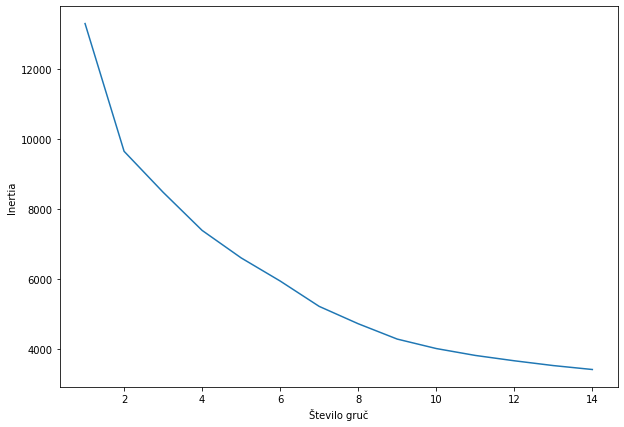

In [32]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.xlabel('Število gruč')
plt.ylabel('Inertia')

## **Inertia**
#### Vsota kvadratov razdalj vsake instance do centra njene gruče. Ko se število gruč povečuje, so seštevki razdalj manjše in instance so bližje centrom svojih gruč. Torej, v tem primeru, bi optimalno število gruč bilo nekje pri 14 gruč.



In [35]:
# 5. PCA transformacija, da naredimo dva nova stolpca, graf raztrosa za optimalno število gruč.
from sklearn.decomposition import PCA, FastICA

df_new_transform = PCA(n_components=2).fit_transform(df_new)
df_new_transform[:5]

array([[8.8476434 , 0.86079328],
       [8.60346162, 0.67614401],
       [8.69672246, 2.04446126],
       [8.20144916, 0.88021167],
       [8.05840541, 0.27160695]])

In [36]:
df_new_transform = pd.DataFrame(df_new_transform, columns=('PrviTransform', 'DrugiTransform'))
df_new_transform.head()

,PrviTransform,DrugiTransform
0,8.847643,0.860793
1,8.603462,0.676144
2,8.696722,2.044461
3,8.201449,0.880212
4,8.058405,0.271607


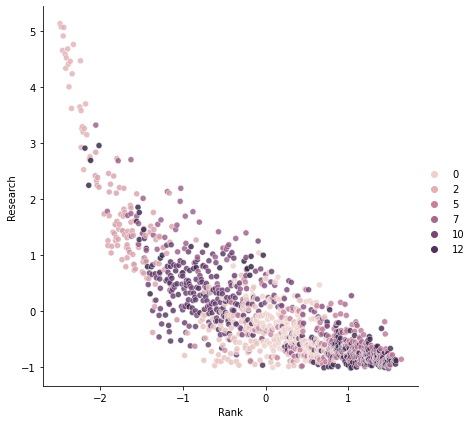

In [59]:
kmeans_opt = KMeans(n_clusters=15, random_state=0).fit(df_new)
sns.relplot(x='Rank', y='Research', hue=kmeans_opt.labels_, alpha=.8, height=6, data=df_new)

In [65]:
# 6. FastICA transformacija, da naredimo dva stolpca, katere vrednosti prikažemo v grafu raztrosa. 

df_new_transf = FastICA(n_components=2).fit_transform(df_new)
df_new_transf[:5]

array([[0.05166531, 0.10830651],
       [0.05337666, 0.10308949],
       [0.0274175 , 0.12305294],
       [0.04628739, 0.10153571],
       [0.05704785, 0.09154987]])

In [66]:
df_new_transf = pd.DataFrame(df_new_transf, columns=('PrviTransf', 'DrugiTransf'))
df_new_transf.head()

,PrviTransf,DrugiTransf
0,0.051665,0.108307
1,0.053377,0.103089
2,0.027418,0.123053
3,0.046287,0.101536
4,0.057048,0.091550


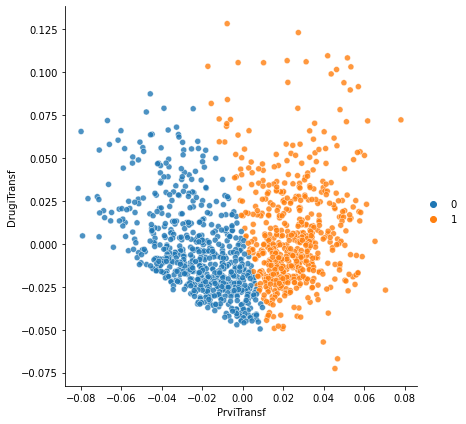

In [68]:
kmeans_fast = KMeans(n_clusters=2, random_state=0).fit(df_new_transf)
sns.relplot(x='PrviTransf', y='DrugiTransf', hue=kmeans_fast.labels_, alpha=.8, height=6, data=df_new_transf)

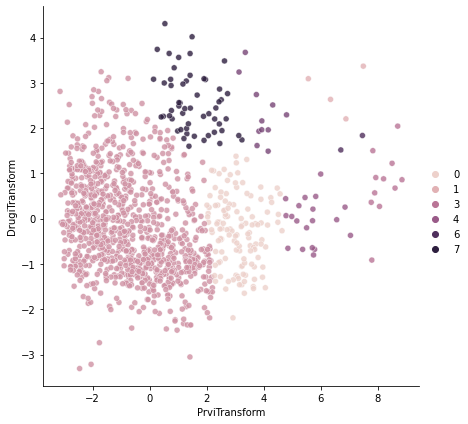

In [69]:
# 7. Uporaba še dva algoritma gručenja nad PCA transformiranimi podatki
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=8).fit(df_new_transform)
sns.relplot(x='PrviTransform', y='DrugiTransform', hue=spectral.labels_, alpha=.8, height=6, data=df_new_transform)

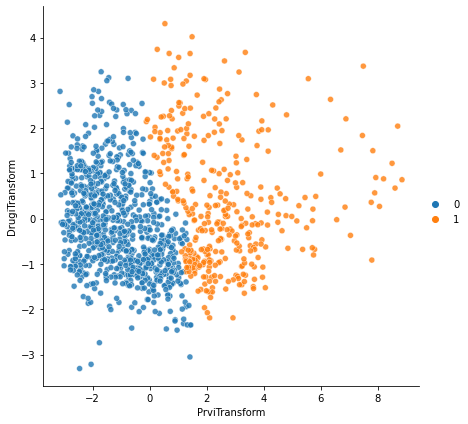

In [70]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2).fit(df_new_transform)
sns.relplot(x='PrviTransform', y='DrugiTransform', hue=agglomerative.labels_, alpha=.8, height=6, data=df_new_transform)